In [1]:
!pip install gdown --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Google Drive direct download URLs
data_url = "https://drive.google.com/uc?id=1M0C3dn7_tewI-35YvH2vHdrN3ULHd0AM"
labels_url = "https://drive.google.com/uc?id=1s7H1eXU9sjpuC0p-bB0Buhs8ldmFH2J3"

# Download files
gdown.download(data_url, "grad_cam.npy", quiet=False)
gdown.download(labels_url, "labels_pred.npy", quiet=False)

# Load data
data = np.load("grad_cam.npy")
labels = np.load("labels_pred.npy")

Downloading...
From: https://drive.google.com/uc?id=1M0C3dn7_tewI-35YvH2vHdrN3ULHd0AM
To: /content/grad_cam.npy
100%|██████████| 28.8M/28.8M [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s7H1eXU9sjpuC0p-bB0Buhs8ldmFH2J3
To: /content/labels_pred.npy
100%|██████████| 15.5k/15.5k [00:00<00:00, 32.7MB/s]


In [4]:
import numpy as np

# Load labels
labels = np.load("labels_pred.npy")

# Identify missing labels from the expected full range (0 to 702)
expected_range = set(range(703))  # 0 to 702 inclusive
present_labels = set(np.unique(labels))
missing_labels = sorted(expected_range - present_labels)

print(f"Missing Labels ({len(missing_labels)}):")
print(missing_labels)

Missing Labels (64):
[6, 11, 15, 32, 36, 37, 53, 60, 71, 73, 95, 102, 128, 142, 159, 161, 190, 199, 239, 248, 252, 260, 273, 303, 306, 312, 323, 343, 353, 354, 356, 364, 382, 383, 392, 414, 419, 424, 430, 431, 434, 439, 445, 461, 463, 465, 466, 467, 503, 508, 516, 517, 519, 520, 523, 540, 563, 579, 607, 614, 648, 649, 659, 699]


Enter index of the image: 7


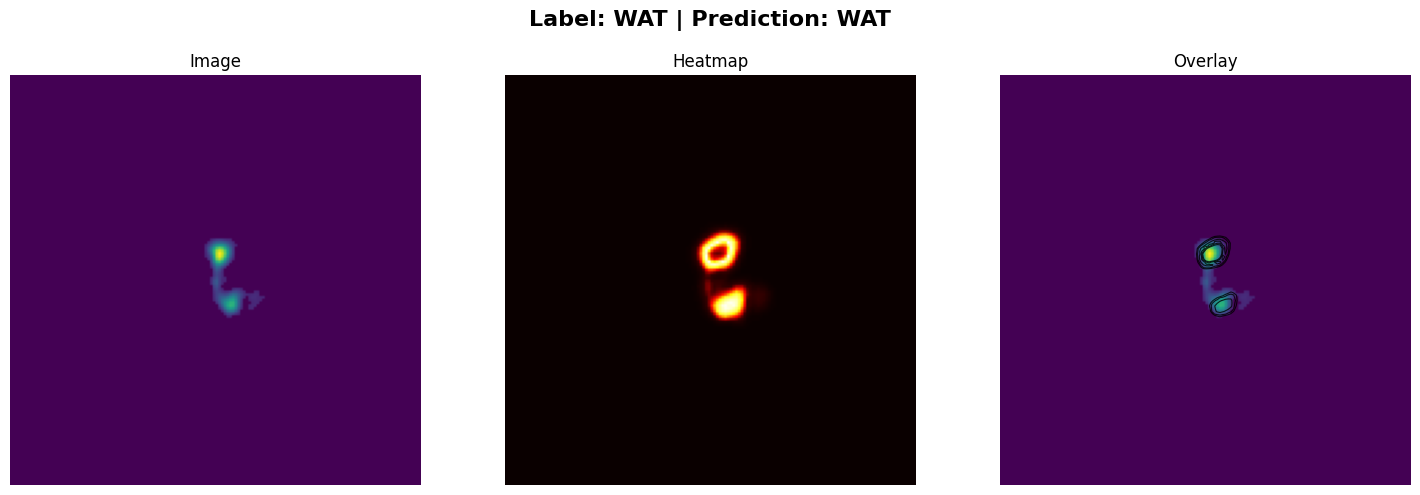

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure we start fresh
labels = np.load("labels_pred.npy")  # shape: (639, 3)
data = np.load("grad_cam.npy")       # shape: (639, 150, 150, 2)

images = data[:, :, :, 0]
heatmaps = data[:, :, :, 1]

# Separate the columns safely
indices = labels[:, 0]
true_labels = labels[:, 1]
preds = labels[:, 2]

# Ask for image index
input_index = int(input('Enter index of the image: '))
assert input_index in indices, f'{input_index} not in the selected dataset'

# Locate it
index = np.where(indices == input_index)[0][0]
image = images[index]
heatmap = heatmaps[index]
label = true_labels[index]
pred = preds[index]

# Optional crop
# c, r = image.shape[0] // 2, 25
# image = image[c - r:c + r, c - r:c + r]
# heatmap = heatmap[c - r:c + r, c - r:c + r]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='viridis')
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].imshow(heatmap, cmap='hot')
ax[1].set_title('Heatmap')
ax[1].axis('off')

ax[2].imshow(image, cmap='viridis')
levels = np.linspace(image.max() - 100, image.max(), 5)
ax[2].contour(heatmap, levels=levels, colors='k', alpha=0.8, linewidths=0.8)
ax[2].set_title('Overlay')
ax[2].axis('off')

fig.suptitle(f'Label: {"WAT" if label == 0 else "NAT"} | Prediction: {"WAT" if pred == 0 else "NAT"}\n',
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

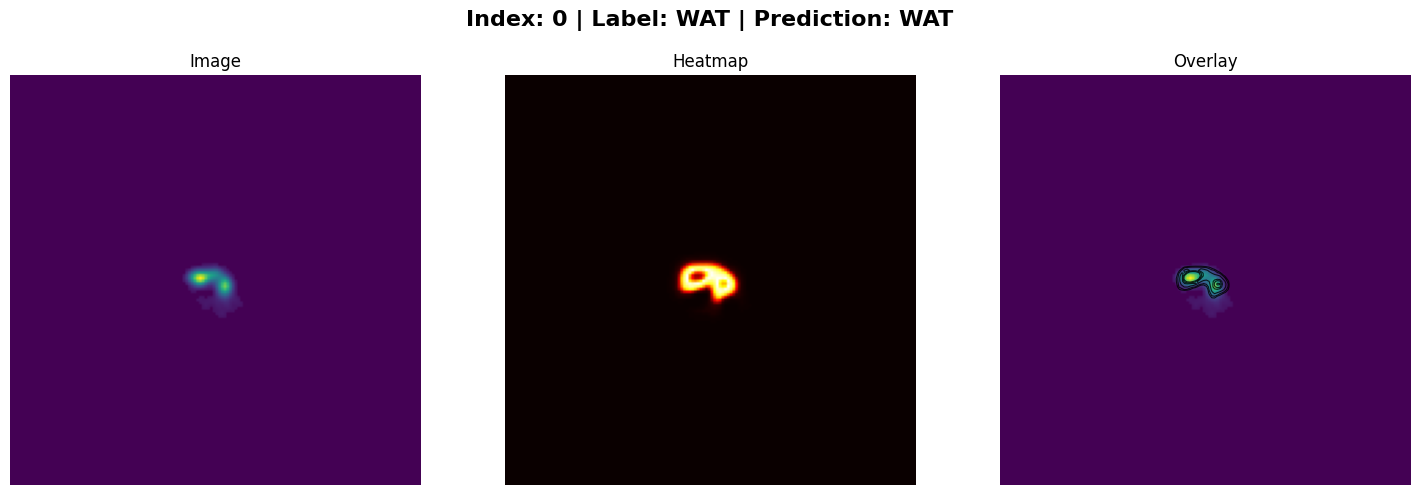

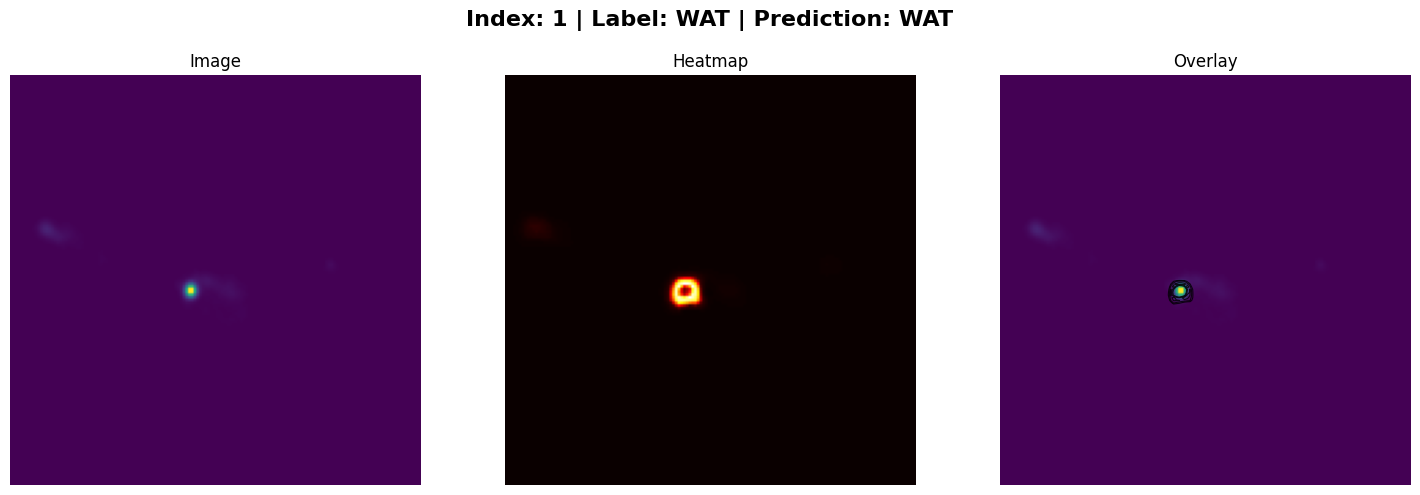

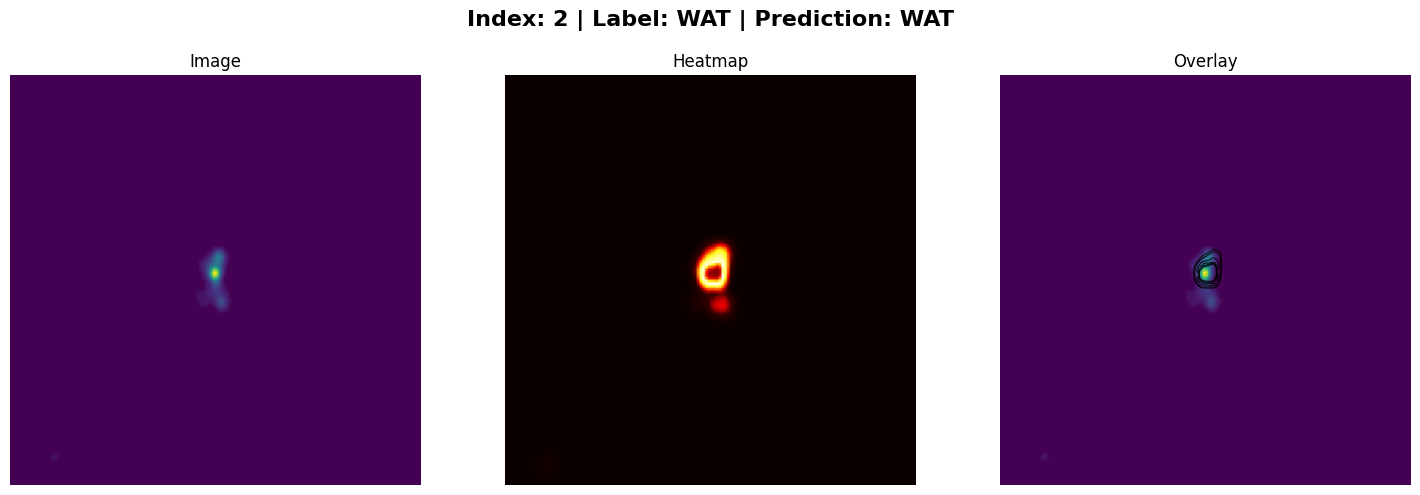

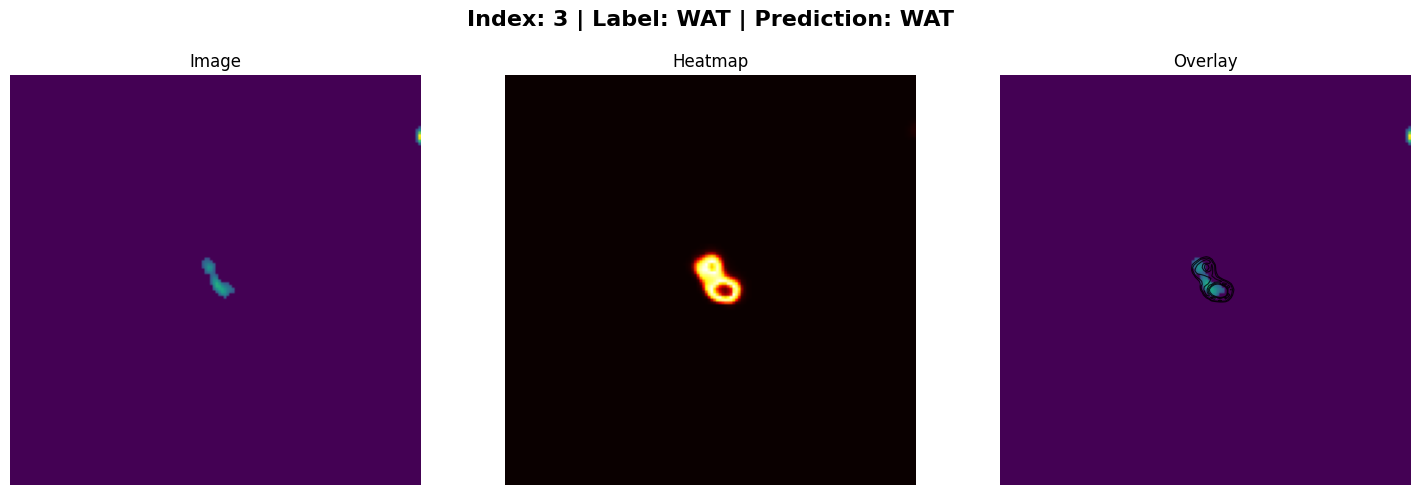

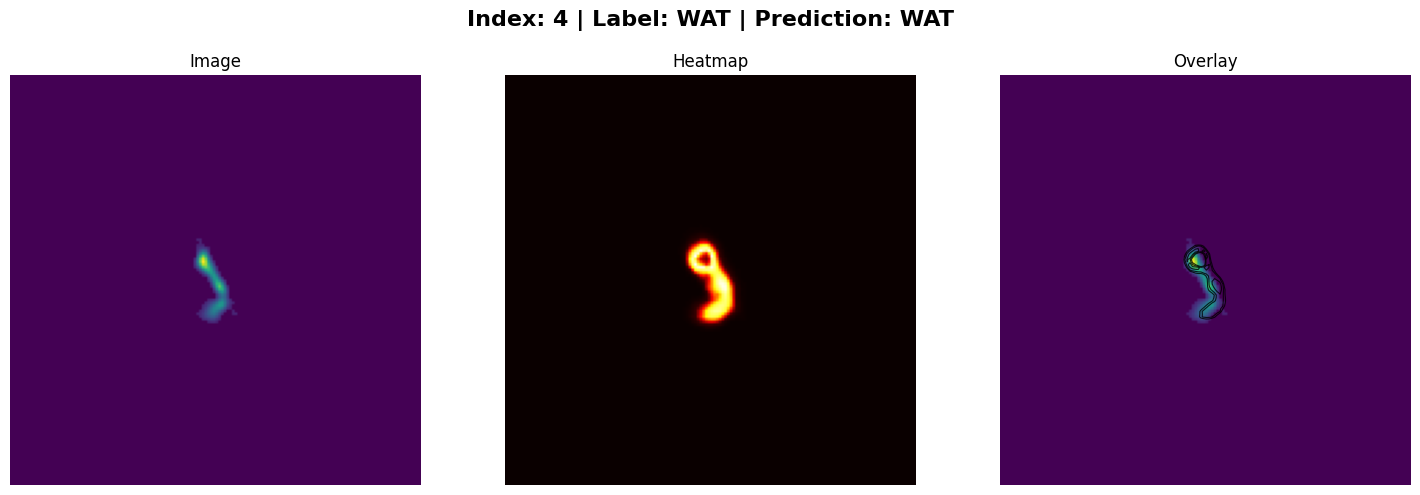

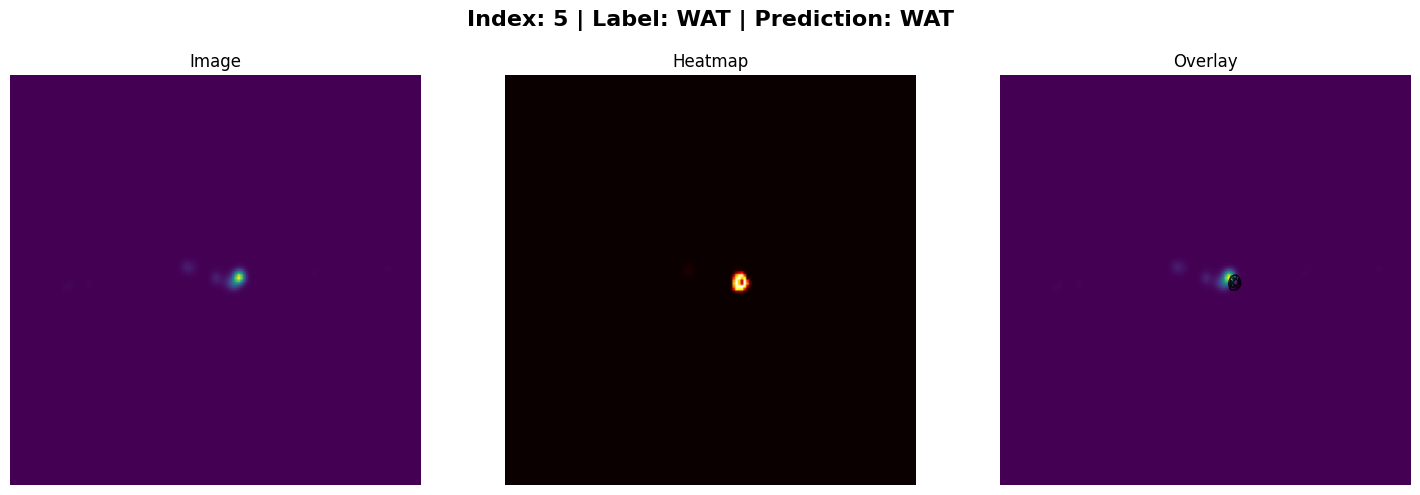

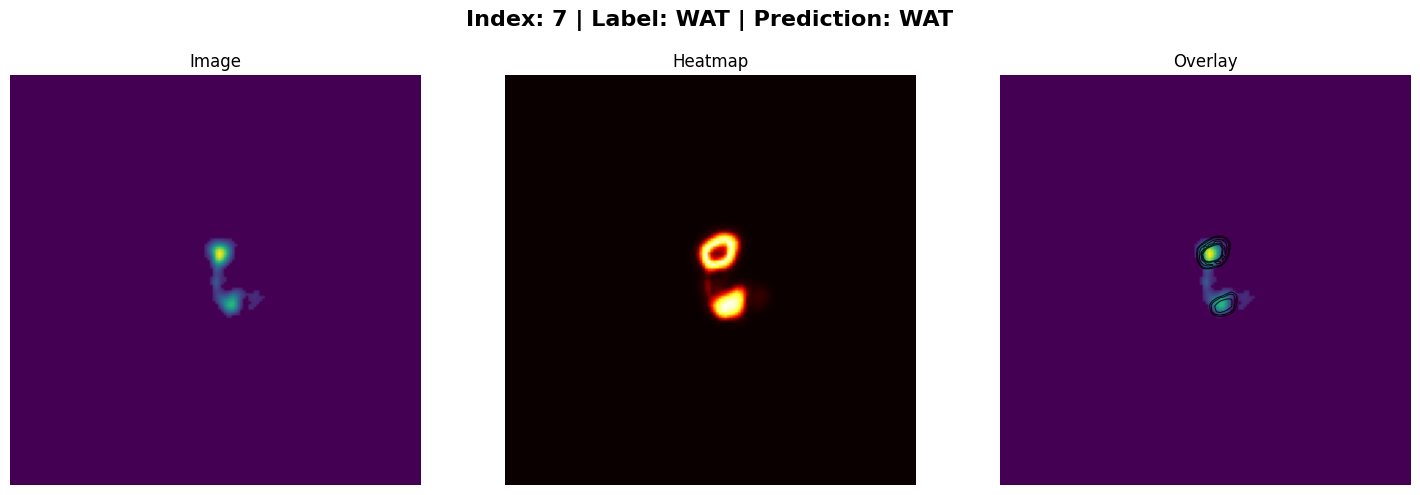

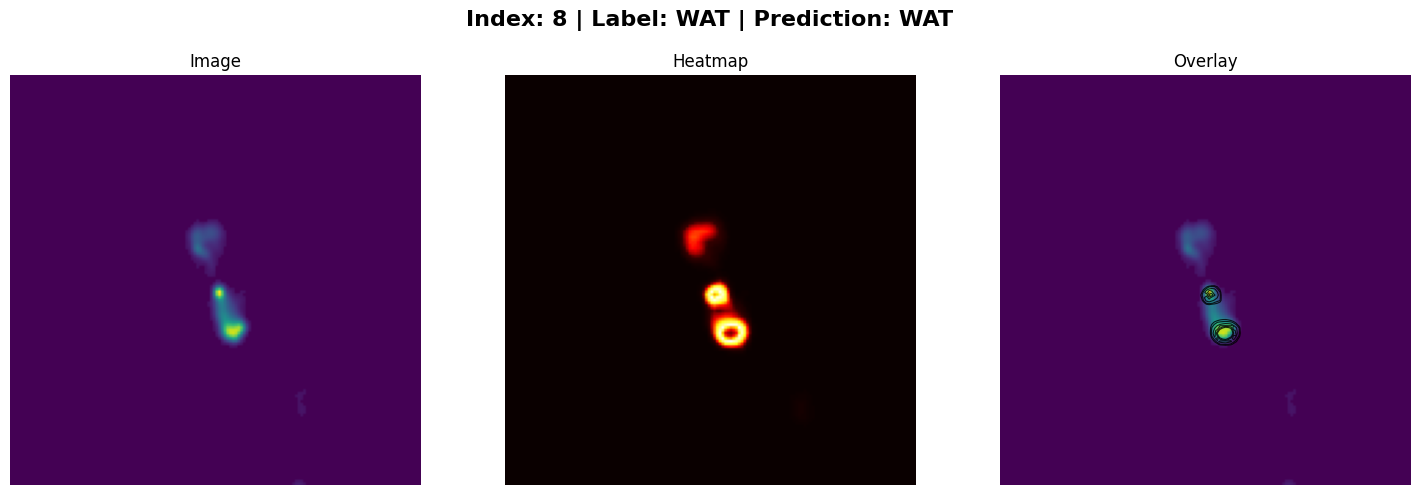

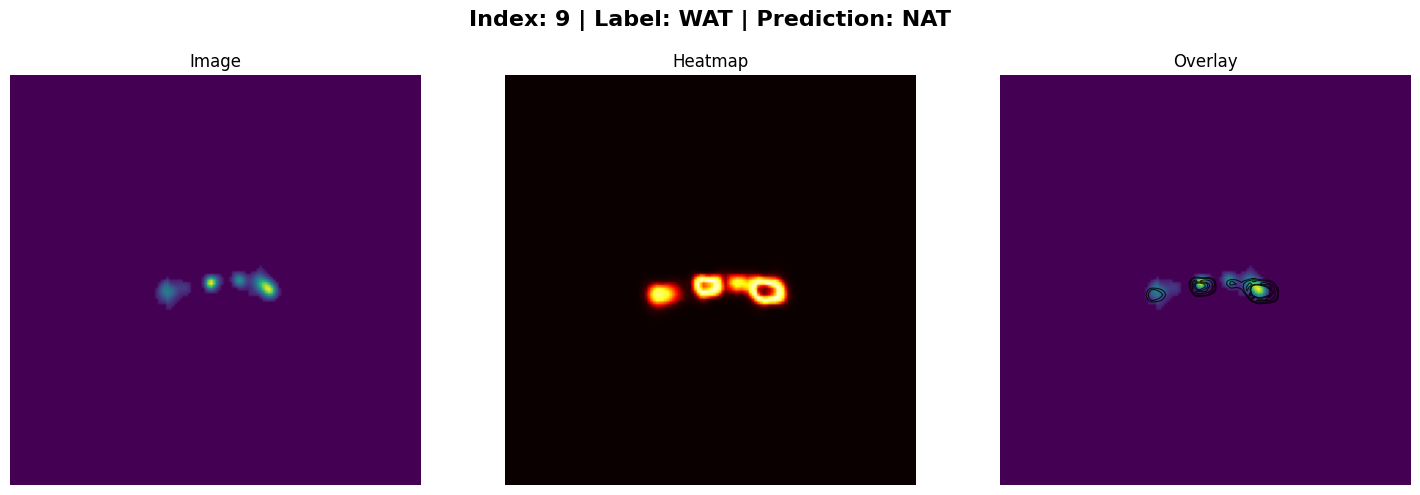

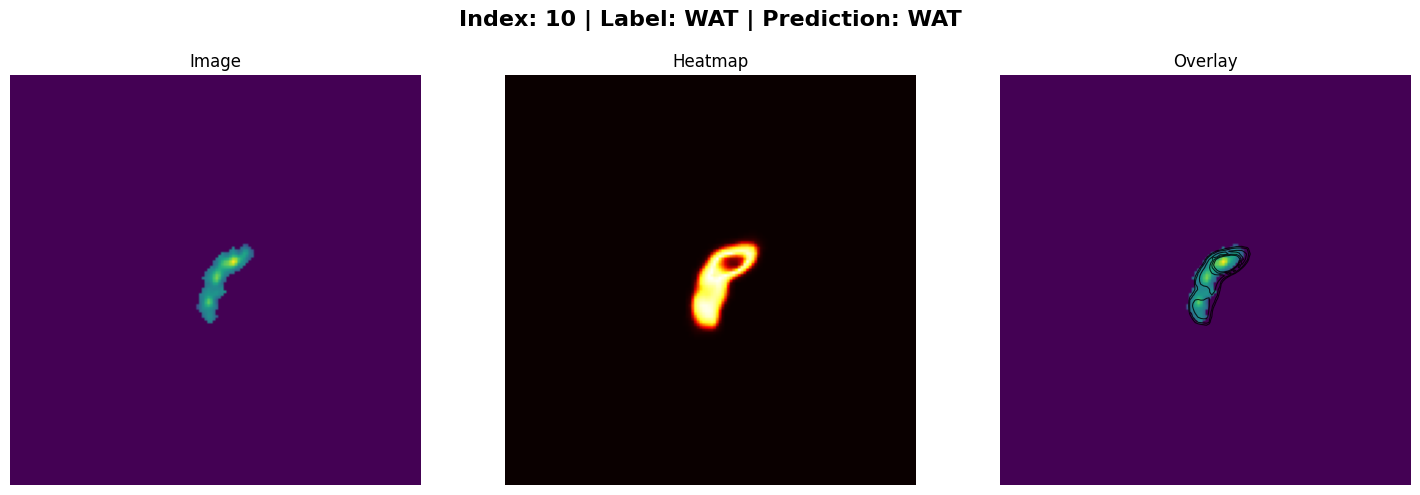

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
labels = np.load("labels_pred.npy")  # shape: (639, 3)
data = np.load("grad_cam.npy")       # shape: (639, 150, 150, 2)

images = data[:, :, :, 0]
heatmaps = data[:, :, :, 1]

# Extract columns
indices = labels[:, 0]
true_labels = labels[:, 1]
preds = labels[:, 2]

# Iterate through first 10 datapoints
for idx in range(10):
    image = images[idx]
    heatmap = heatmaps[idx]
    label = true_labels[idx]
    pred = preds[idx]

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image, cmap='viridis')
    ax[0].set_title('Image')
    ax[0].axis('off')

    ax[1].imshow(heatmap, cmap='hot')
    ax[1].set_title('Heatmap')
    ax[1].axis('off')

    ax[2].imshow(image, cmap='viridis')
    levels = np.linspace(image.max() - 100, image.max(), 5)
    ax[2].contour(heatmap, levels=levels, colors='k', alpha=0.8, linewidths=0.8)
    ax[2].set_title('Overlay')
    ax[2].axis('off')

    fig.suptitle(
        f'Index: {indices[idx]} | '
        f'Label: {"WAT" if label == 0 else "NAT"} | '
        f'Prediction: {"WAT" if pred == 0 else "NAT"}\n',
        fontsize=16, fontweight='bold'
    )

    plt.tight_layout()
    plt.show()

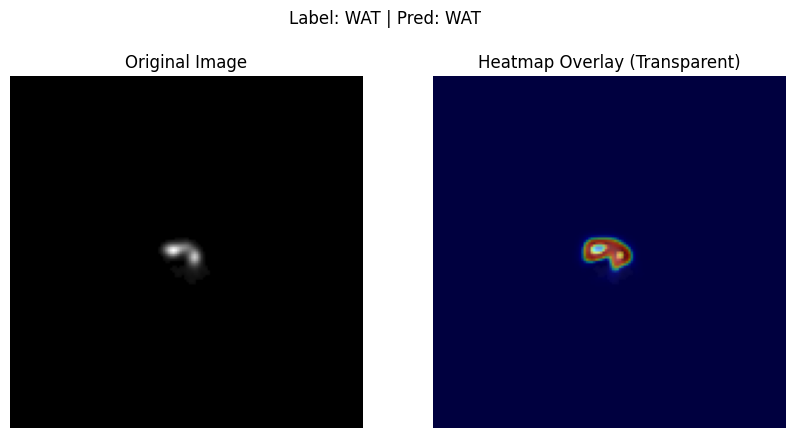

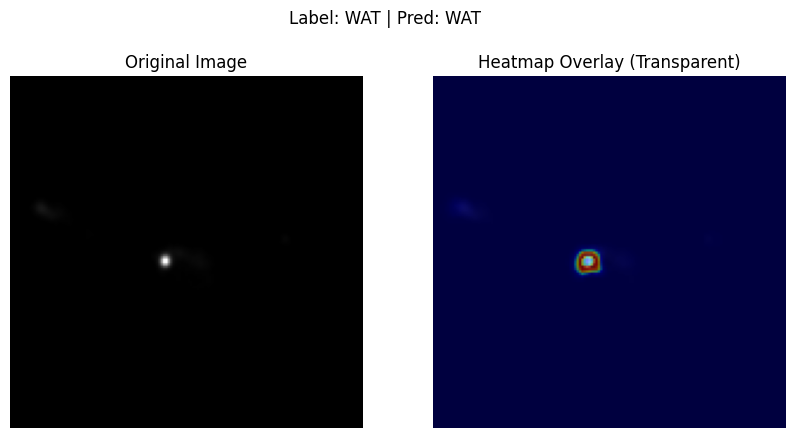

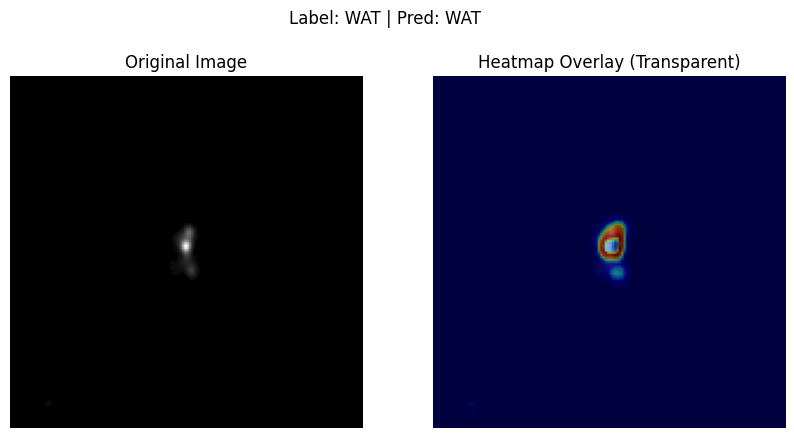

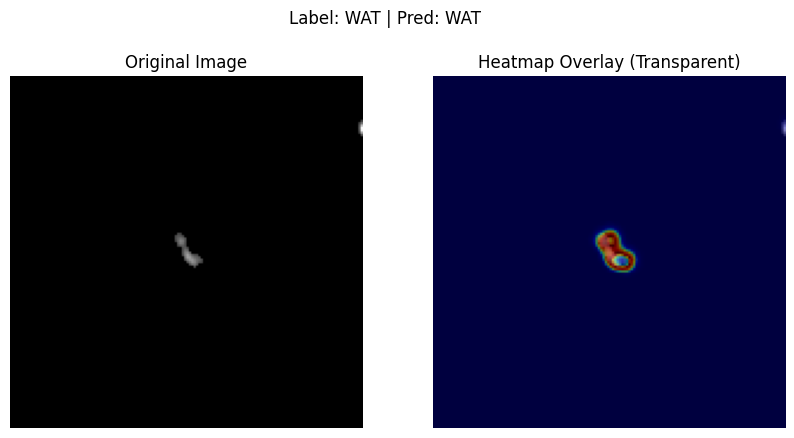

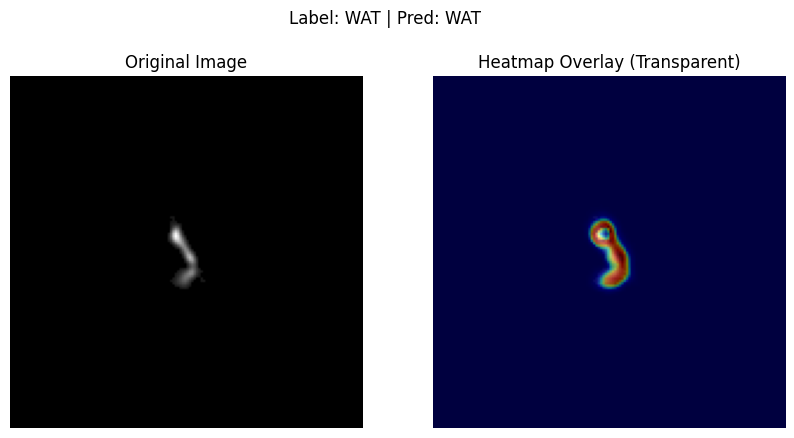

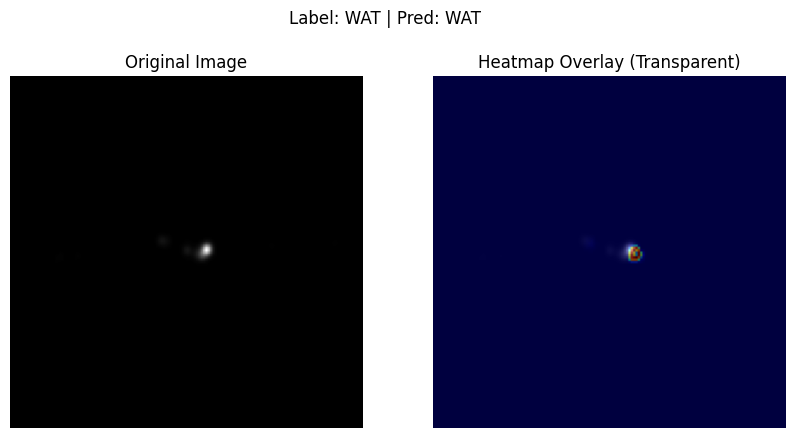

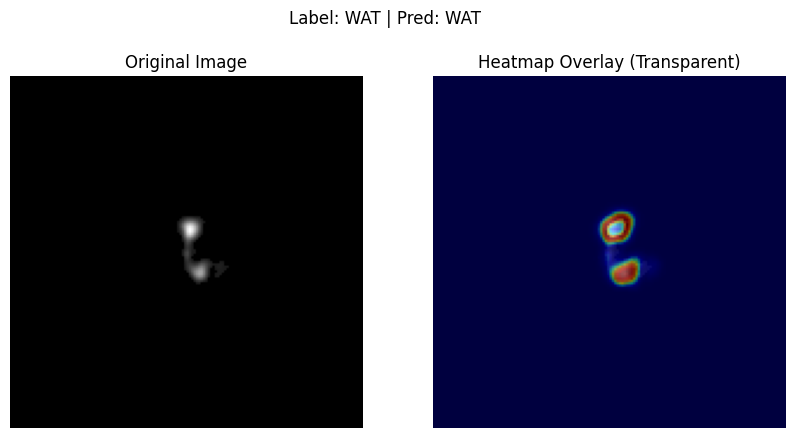

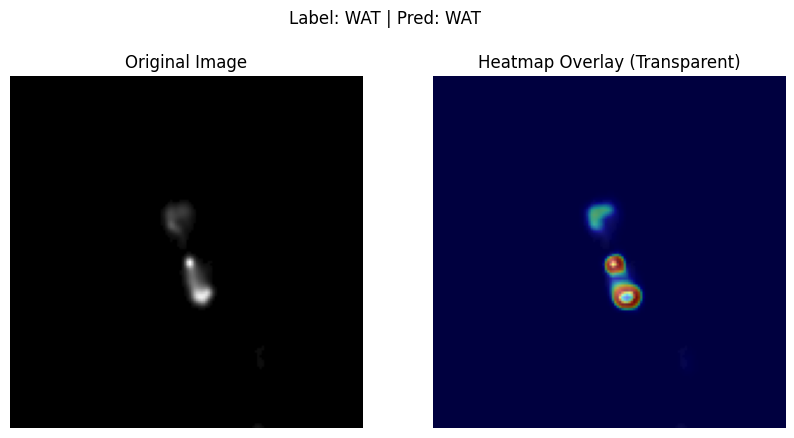

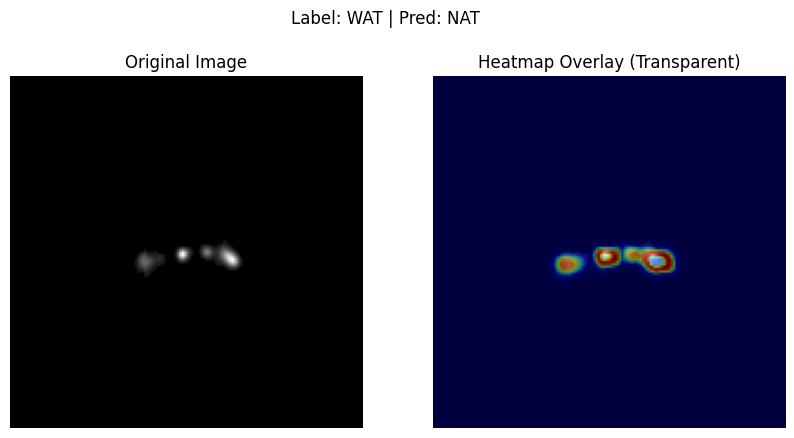

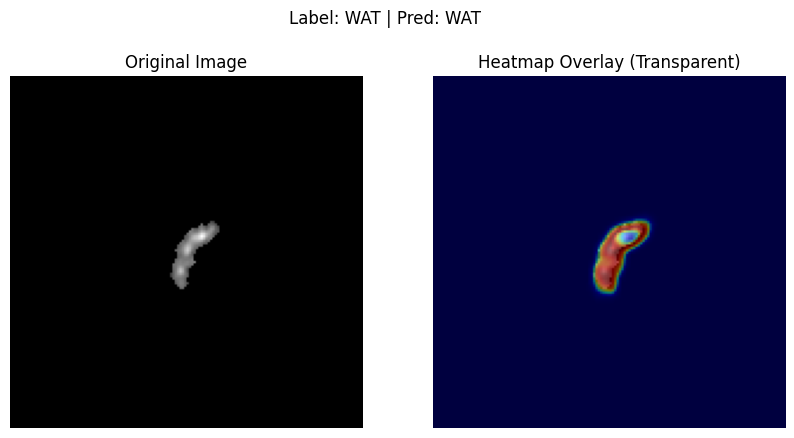

In [10]:
for idx in range(10):
    image = images[idx]
    heatmap = heatmaps[idx]

    # Normalize heatmap
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Overlay heatmap with transparency
    ax[1].imshow(image, cmap='gray')
    ax[1].imshow(heatmap, cmap='jet', alpha=0.5)  # 'jet' colormap for better visibility
    ax[1].set_title('Heatmap Overlay (Transparent)')
    ax[1].axis('off')

    plt.suptitle(f"Label: {'WAT' if true_labels[idx] == 0 else 'NAT'} | Pred: {'WAT' if preds[idx] == 0 else 'NAT'}")
    plt.show()

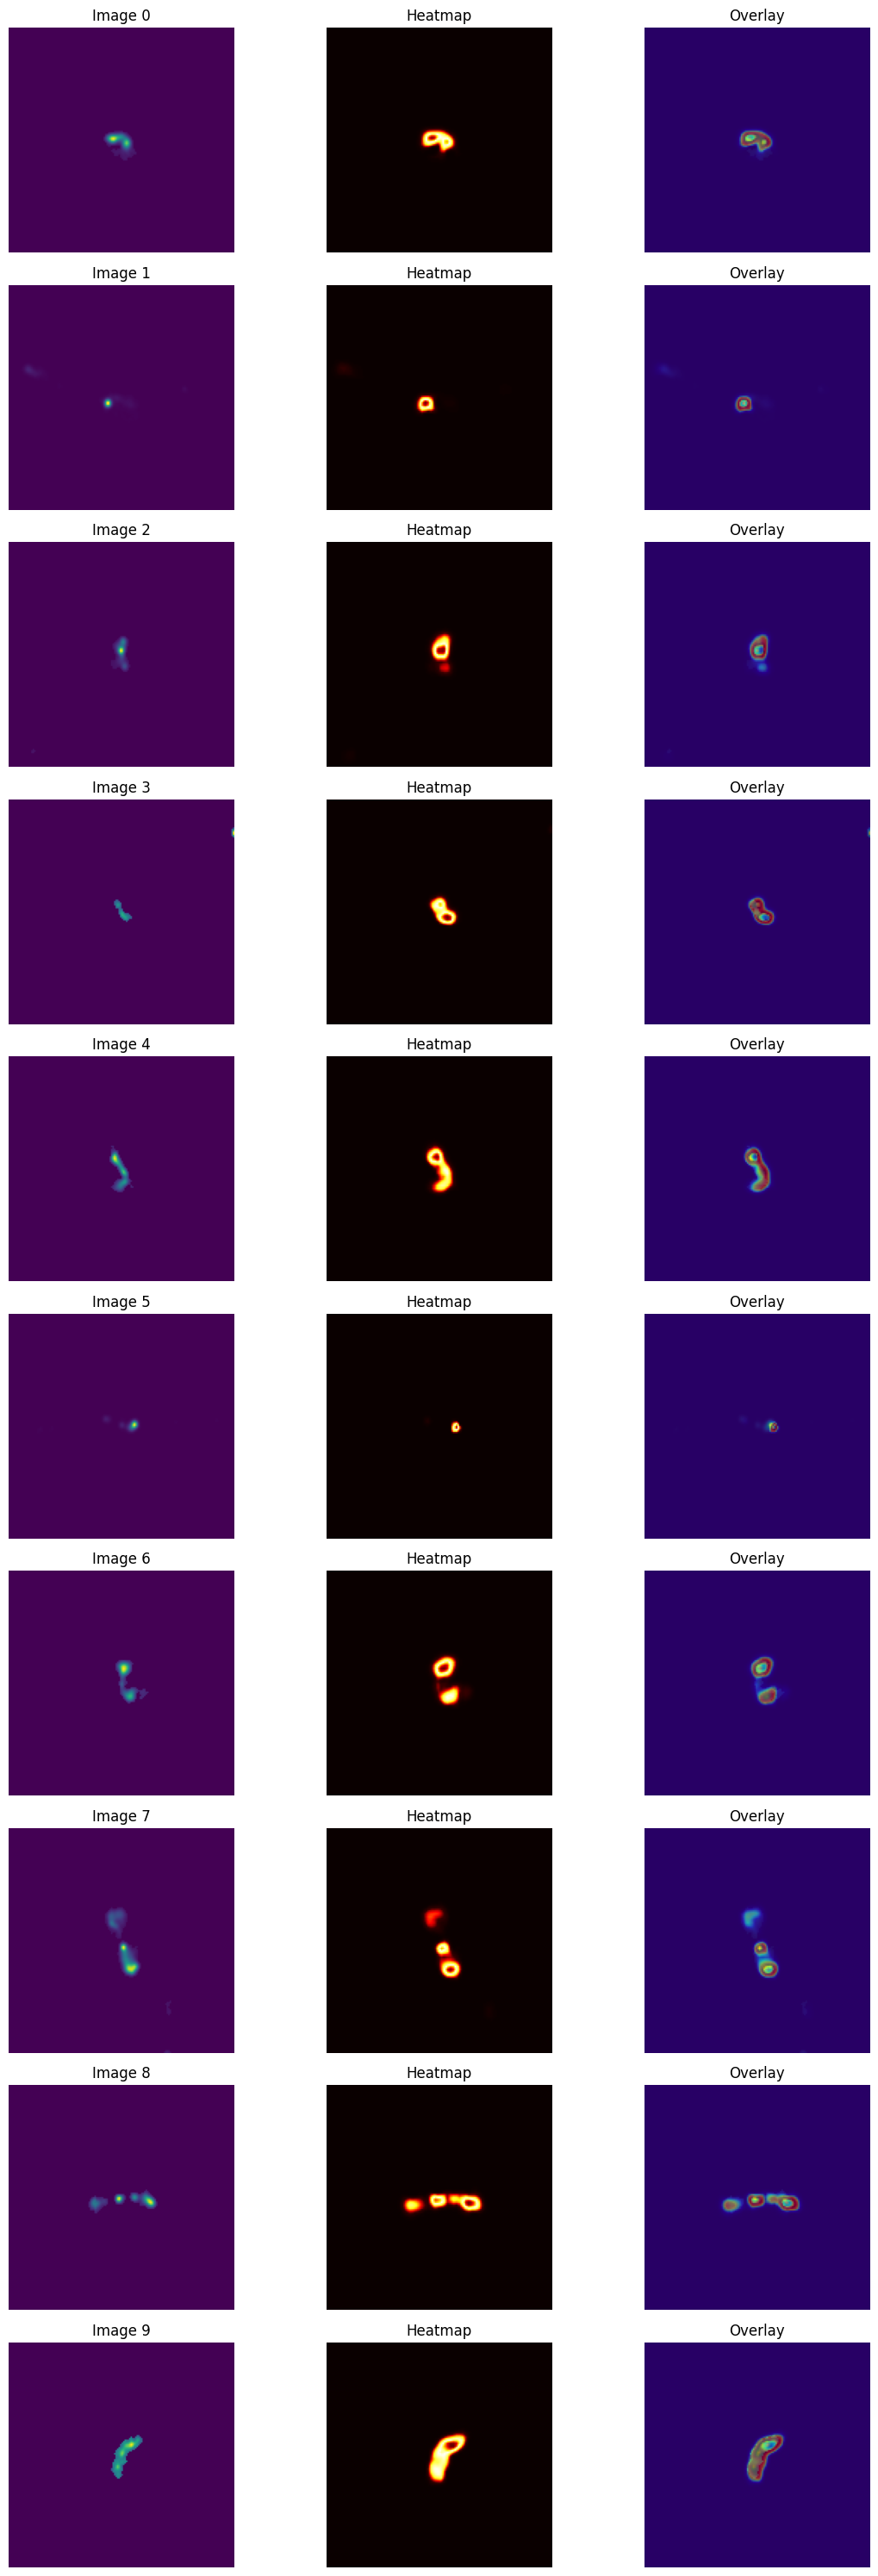

In [14]:
fig, axes = plt.subplots(10, 3, figsize=(12, 30))

for idx in range(10):
    # Original Image
    axes[idx, 0].imshow(images[idx], cmap='viridis')
    axes[idx, 0].set_title(f'Image {idx}')
    axes[idx, 0].axis('off')

    # Heatmap
    axes[idx, 1].imshow(heatmaps[idx], cmap='hot')
    axes[idx, 1].set_title('Heatmap')
    axes[idx, 1].axis('off')

    # Overlay
    axes[idx, 2].imshow(images[idx], cmap='viridis')
    axes[idx, 2].imshow(heatmaps[idx], cmap='jet', alpha=0.4)
    axes[idx, 2].set_title('Overlay')
    axes[idx, 2].axis('off')

plt.tight_layout()
plt.show()